# Predictions with the comparison with baseline

Update 10/Nov/2020
add Kernel Ridge Regression as a comparison, parameter setting is the same as GPR.

Upate 05/Nov/2020
Update plots for 7 reps for round 1.

Update 29/Oct/2020  
We now have Round 1's results. We observe that the consensus sequence has very different labels for different plates/rounds. So we decide to normalise to the consensus sequence (before log normalisation and z-normalisation, subtract the mean of each consensus sequence mean in each plate/round). We will call the normalisation methods as **plate normalisation** and **round normalisation** respectively.
Let's see how the predictions look like for different normalisation methods on the following training/testing pairs
- train 80% round 0 and test 20% round 0
- train round 0 and test round 1
- train 80% all data (round 0 + 1) and test the rest

As always, we consider GPR with RBF, one-hot as a baseline model we would like to compare with.
Our model GPR with wd kernel with shift.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math
import json
import xarray as xr

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import KFold

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import *
from codes.kernels_for_GPK import *

import pickle
import xarray

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

## Read Data and Set Up

In [2]:
# plate normalisation
# plateRep_Path = '../../data/Results_Microplate_partialTrue_normTrue_plateRep_formatSeq_logTrue.csv'
# round normalisation
roundRep_Path = '../../data/Results_Microplate_partialTrue_normTrue_roundRep_formatSeq_logTrue.csv'

# plate_df = pd.read_csv(plateRep_Path)
round_df = pd.read_csv(roundRep_Path)

In [3]:
def run_kfold(df,kernel, embedding, train_idx = None, test_idx = None, 
              num_split = 5,num_repeat = 10,s_list = [1],alpha_list= [2],l_list = [6]):
    gpr = GPR_Predictor(df, train_idx = train_idx, test_idx = test_idx, embedding = embedding, kernel_name = kernel)
    result_DataArray_wd = gpr.Repeated_kfold(num_split=num_split, num_repeat=num_repeat, alpha_list= alpha_list,
                                          l_list = l_list, s_list = s_list)
    # print(result_DataArray_wd[1].mean(axis = -1).mean(axis=-1))
    return result_DataArray_wd

def run_regression(df,kernel, embedding, predictor = GPR_Predictor, train_idx = None, test_idx = None, 
               eva_metric = [mean_squared_error, r2_score], l = 6, s = 1, sigma_0=1, alpha = 2, eva_on='seqs', title = 'Prediction'):
    # train and test on round 0
    gpr_train_samples = predictor(df, train_idx= train_idx, test_idx=test_idx, kernel_name = kernel, embedding = embedding,     
                                    eva_metric = eva_metric, l = l, s = s, sigma_0 = sigma_0, alpha = alpha, eva_on=eva_on)
    gpr_train_samples.regression()
    gpr_train_samples.scatter_plot(title = title)
    
    if predictor == GPR_Predictor and kernel == 'WD_Kernel_Shift':
        # gpr_train_samples.line_plot()
        train_df = gpr_train_samples.train_df.drop_duplicates(subset = ['RBS']).reset_index()
        test_df = gpr_train_samples.test_df.drop_duplicates(subset = ['RBS']).reset_index().drop(columns = ['level_0'])
        train_df['train_test'] = 'train'
        test_df['train_test'] = 'test'
        train_test_df = pd.concat([train_df, test_df])
        train_test_df = train_test_df.reset_index().drop(['level_0'], axis = 1)
        gpr_train_samples.sort_kernel_label_plot(train_test_df, 'Data Similarity and Prediction, Sorted by TIR Label', group_flag = True)
        gpr_train_samples.sort_kernel_label_plot(train_test_df, 'Data Similarity and Prediction, Sorted by RBS Similarity', 'seq_distance', group_flag = True)
    # else:
    #    gpr_train_samples.scatter_plot(title = title) 



## Train and Test on Round 0

X train shape:  (845, 20)
X test shape:  (35, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fd067cd3510>
Train:  0.13367105994891285
Test:  0.569865417992661
<function r2_score at 0x7fd067cd3730>
Train:  0.8452978855612594
Test:  0.31989602796799155
coverage rate: 
Train:  0.9715976331360947
Test:  0.8857142857142857
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


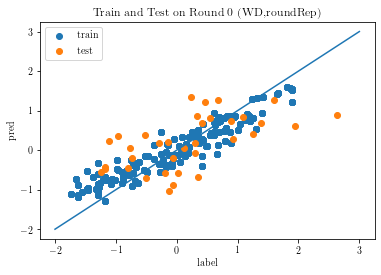

init kernel
groups:  ['Consensus', 'BPS-C', 'BPS-NC', 'UNI', 'PPM', 'Bandit-0']
Group:  Consensus
Number of sequences:  1
number of clusters:  1
Group:  BPS-C
Number of sequences:  18
number of clusters:  4
Group:  BPS-NC
Number of sequences:  41
number of clusters:  9
Group:  UNI
Number of sequences:  29
number of clusters:  6
Group:  PPM
Number of sequences:  28
number of clusters:  6
Group:  Bandit-0
Number of sequences:  59
number of clusters:  12
init kernel
groups:  ['Consensus', 'BPS-C', 'BPS-NC', 'UNI', 'PPM', 'Bandit-0']
Group:  Consensus
Number of sequences:  1
number of clusters:  1
Group:  BPS-C
Number of sequences:  18
number of clusters:  3
Group:  BPS-NC
Number of sequences:  41
number of clusters:  6
Group:  UNI
Number of sequences:  29
number of clusters:  4
Group:  PPM
Number of sequences:  28
number of clusters:  4
Group:  Bandit-0
Number of sequences:  59
number of clusters:  8
X train shape:  (845, 20)
X test shape:  (35, 20)
create kernel instance
init kernel
fini

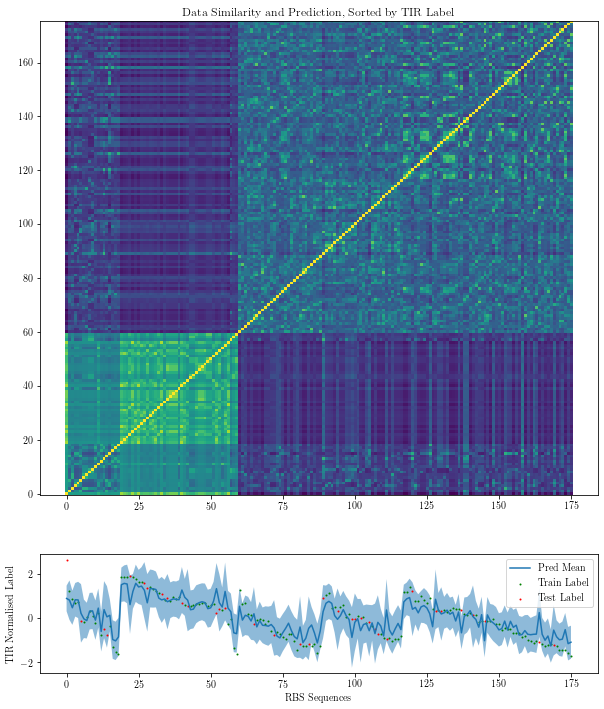

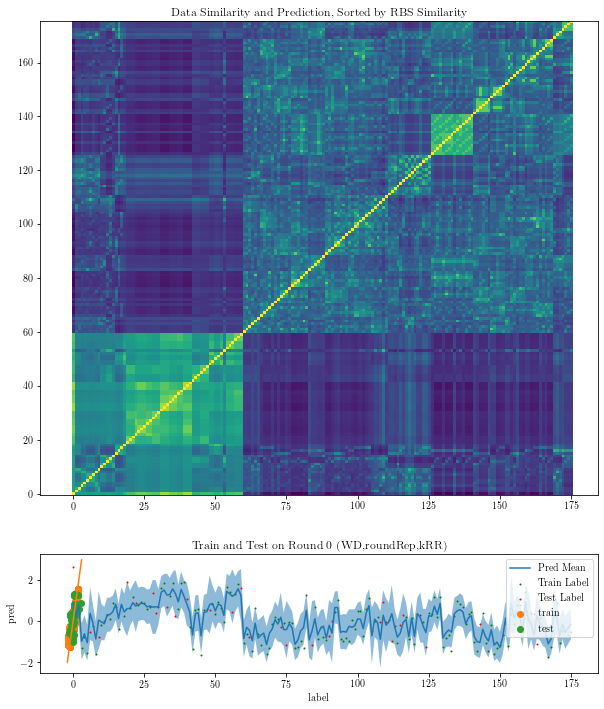

X train shape:  (845, 80)
X test shape:  (35, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fd067cd3510>
Train:  0.16470969656940904
Test:  0.6181827849537361
<function r2_score at 0x7fd067cd3730>
Train:  0.8093758040252736
Test:  0.26223182840293113
coverage rate: 
Train:  0.9502958579881656
Test:  0.8571428571428571


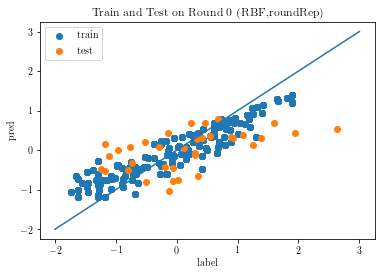

In [4]:
# setting

kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

# run_regression(plate_df[plate_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (WD,plateRep)')
run_regression(round_df[round_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (WD,roundRep)')
run_regression(round_df[round_df['Plate'] != 'Third_Plate'], kernel, embedding, predictor=KRR_Predictor, title = 'Train and Test on Round 0 (WD,roundRep,kRR)')

kernel = 'RBF'
embedding = 'onehot'

# run_regression(plate_df[plate_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (RBF,plateRep)')
run_regression(round_df[round_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (RBF,roundRep)')

## Train on Round 0 and Test on Round 1

X train shape:  (1055, 20)
X test shape:  (89, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fd067cd3510>
Train:  0.15564239490429324
Test:  0.9312662445764347
<function r2_score at 0x7fd067cd3730>
Train:  0.8201007695234941
Test:  -0.0007078443594799033
coverage rate: 
Train:  0.9488151658767773
Test:  0.8539325842696629


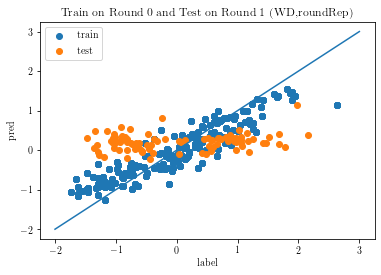

init kernel
groups:  ['Consensus', 'BPS-C', 'BPS-NC', 'UNI', 'PPM', 'Bandit-0', 'Bandit-1']
Group:  Consensus
Number of sequences:  2
number of clusters:  1
Group:  BPS-C
Number of sequences:  18
number of clusters:  4
Group:  BPS-NC
Number of sequences:  41
number of clusters:  9
Group:  UNI
Number of sequences:  29
number of clusters:  6
Group:  PPM
Number of sequences:  28
number of clusters:  6
Group:  Bandit-0
Number of sequences:  59
number of clusters:  12
Group:  Bandit-1
Number of sequences:  88
number of clusters:  18
init kernel
groups:  ['Consensus', 'BPS-C', 'BPS-NC', 'UNI', 'PPM', 'Bandit-0', 'Bandit-1']
Group:  Consensus
Number of sequences:  2
number of clusters:  1
Group:  BPS-C
Number of sequences:  18
number of clusters:  3
Group:  BPS-NC
Number of sequences:  41
number of clusters:  6
Group:  UNI
Number of sequences:  29
number of clusters:  4
Group:  PPM
Number of sequences:  28
number of clusters:  4
Group:  Bandit-0
Number of sequences:  59
number of clusters:  8

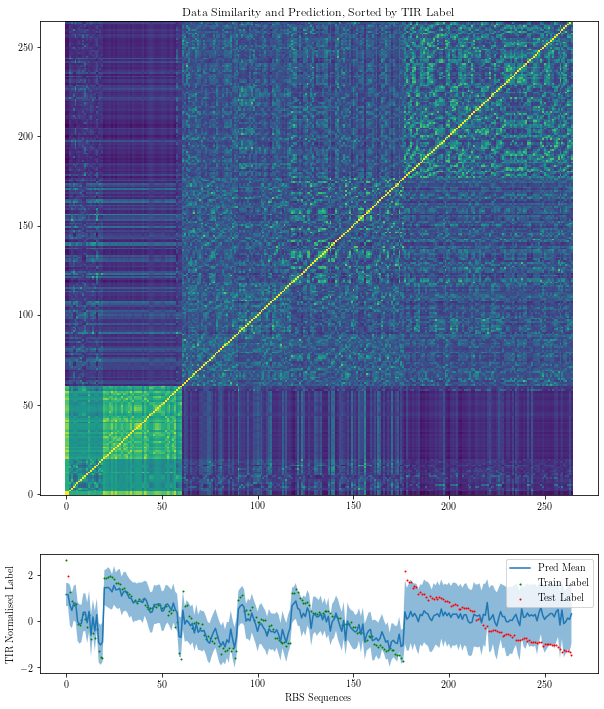

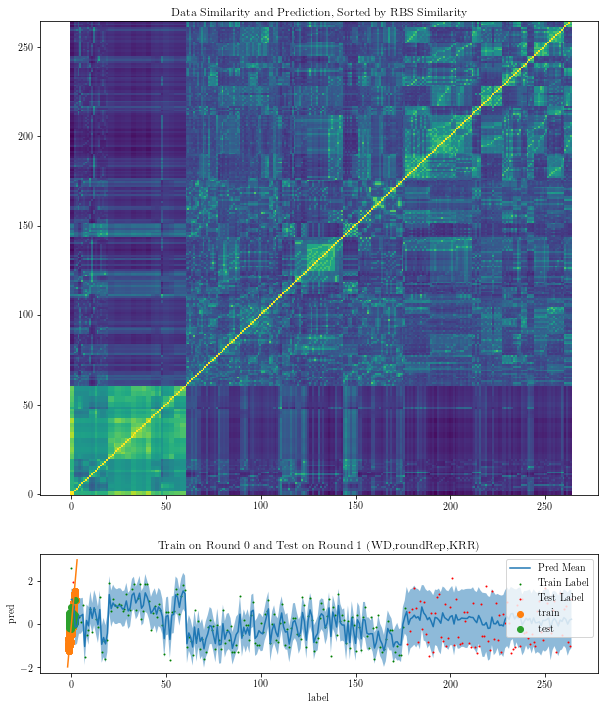

X train shape:  (1055, 80)
X test shape:  (89, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fd067cd3510>
Train:  0.19108513073148897
Test:  0.8303193283472697
<function r2_score at 0x7fd067cd3730>
Train:  0.7791342905303165
Test:  0.10776636645052384
coverage rate: 
Train:  0.9260663507109005
Test:  0.797752808988764


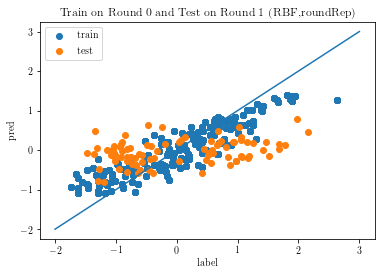

In [10]:
# setting
kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

# run_regression(plate_df, kernel, embedding, train_idx= plate_df['Plate'] != 'Third_Plate', 
#                 test_idx= plate_df['Plate'] == 'Third_Plate', title = ' Train on Round 0 & Test on Round 1 (WD,plateRep)')
run_regression(round_df, kernel, embedding, train_idx= round_df['Plate'] != 'Third_Plate', 
                test_idx= round_df['Plate'] == 'Third_Plate',  title = 'Train on Round 0 and Test on Round 1 (WD,roundRep)')
run_regression(round_df, kernel, embedding, train_idx= round_df['Plate'] != 'Third_Plate', 
                test_idx= round_df['Plate'] == 'Third_Plate', predictor=KRR_Predictor, title = 'Train on Round 0 and Test on Round 1 (WD,roundRep,KRR)')

kernel = 'RBF'
embedding = 'onehot'

# run_regression(plate_df, kernel, embedding, train_idx= plate_df['Plate'] != 'Third_Plate', 
#                 test_idx= plate_df['Plate'] == 'Third_Plate', title = ' Train on Round 0 & Test on Round 1 (RBF,plateRep)')
run_regression(round_df, kernel, embedding, train_idx= round_df['Plate'] != 'Third_Plate', 
                test_idx= round_df['Plate'] == 'Third_Plate',  title = 'Train on Round 0 and Test on Round 1 (RBF,roundRep)')

# train and test on round 0
# gpr_train_samples = GPR_Predictor(df[df['Plate'] != 'Third_Plate'], kernel_name = kernel, embedding = embedding, eva_metric = eva_metric, l = 6, s = 1, alpha = 2, eva_on='seqs')

# train on round 0 (plate 1 and 2) and test on round 1 (plate 3)
# gpr_train_samples = GPR_Predictor(df, train_idx= df['Plate'] != 'Third_Plate', test_idx= df['Plate'] == 'Third_Plate', 
#                    kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
#                    l = 6, s = 1, alpha = 2, eva_on='seqs')

## Train and Test on All Rounds Data

X train shape:  (1070, 20)
X test shape:  (53, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fd067cd3510>
Train:  0.21538696110600722
Test:  0.7557576053255916
<function r2_score at 0x7fd067cd3730>
Train:  0.7572784458803419
Test:  0.09142576080956888
coverage rate: 
Train:  0.9327102803738317
Test:  0.7358490566037735


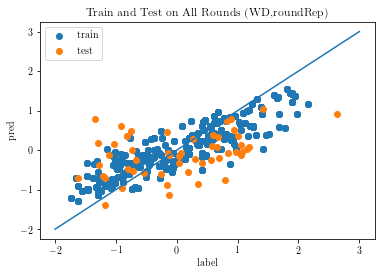

init kernel
groups:  ['Consensus', 'BPS-C', 'BPS-NC', 'UNI', 'PPM', 'Bandit-0', 'Bandit-1']
Group:  Consensus
Number of sequences:  2
number of clusters:  1
Group:  BPS-C
Number of sequences:  18
number of clusters:  4
Group:  BPS-NC
Number of sequences:  41
number of clusters:  9
Group:  UNI
Number of sequences:  29
number of clusters:  6
Group:  PPM
Number of sequences:  28
number of clusters:  6
Group:  Bandit-0
Number of sequences:  59
number of clusters:  12
Group:  Bandit-1
Number of sequences:  88
number of clusters:  18
init kernel
groups:  ['Consensus', 'BPS-C', 'BPS-NC', 'UNI', 'PPM', 'Bandit-0', 'Bandit-1']
Group:  Consensus
Number of sequences:  2
number of clusters:  1
Group:  BPS-C
Number of sequences:  18
number of clusters:  3
Group:  BPS-NC
Number of sequences:  41
number of clusters:  6
Group:  UNI
Number of sequences:  29
number of clusters:  4
Group:  PPM
Number of sequences:  28
number of clusters:  4
Group:  Bandit-0
Number of sequences:  59
number of clusters:  8

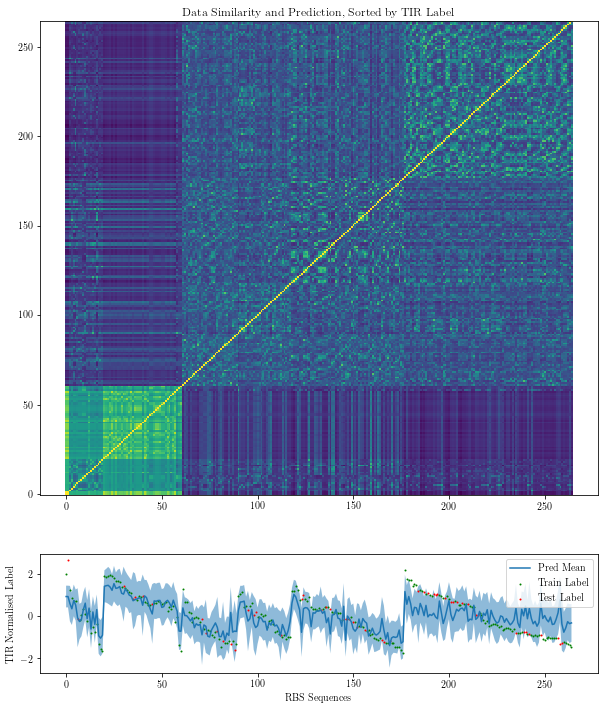

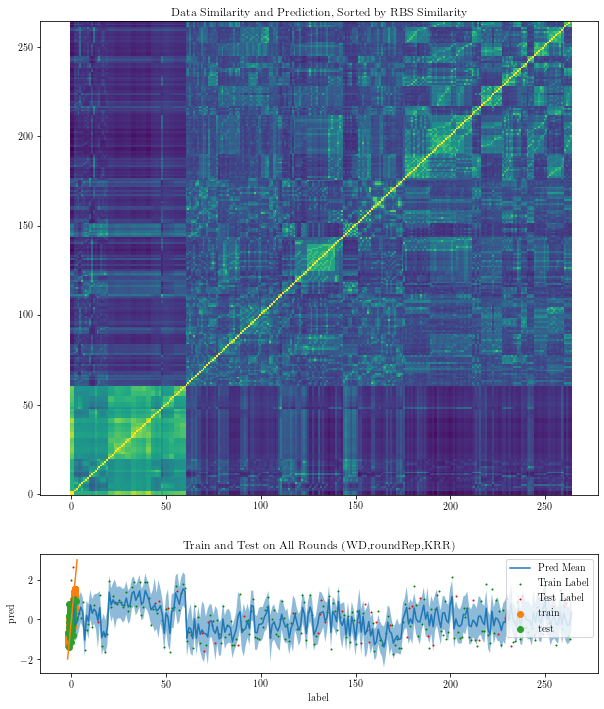

X train shape:  (1070, 80)
X test shape:  (53, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fd067cd3510>
Train:  0.2650948016471761
Test:  0.6956159380259984
<function r2_score at 0x7fd067cd3730>
Train:  0.7012622216570634
Test:  0.1637282678903026
coverage rate: 
Train:  0.8794392523364486
Test:  0.7547169811320755


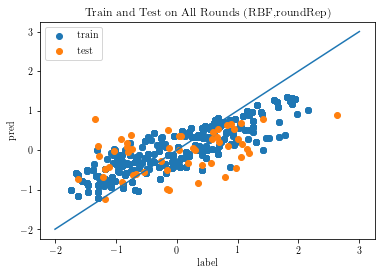

In [11]:
# setting
kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

# run_regression(plate_df, kernel, embedding, title = 'Train and Test on All Rounds (WD,plateRep)')
run_regression(round_df, kernel, embedding, title = 'Train and Test on All Rounds (WD,roundRep)')
run_regression(round_df, kernel, embedding, predictor=KRR_Predictor, title = 'Train and Test on All Rounds (WD,roundRep,KRR)')

kernel = 'RBF'
embedding = 'onehot'

# run_regression(plate_df, kernel, embedding, title = 'Train and Test on All Rounds (RBF,plateRep)')
run_regression(round_df, kernel, embedding, title = 'Train and Test on All Rounds (RBF,roundRep)')

In [ ]:
# kernel = 'RBF'
# embedding = 'onehot'
# eva_metric = [mean_squared_error, r2_score]

# # gpr_train_samples = GPR_Predictor(df, kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
# #                    alpha = 2, eva_on='seqs')

# # train and test on round 0
# gpr_train_samples = GPR_Predictor(df[df['Plate'] != 'Third_Plate'], kernel_name = kernel, embedding = embedding, eva_metric = eva_metric, alpha = 2, eva_on='seqs')

# # train on round 0 (plate 1 and 2) and test on round 1 (plate 3)
# # gpr_train_samples = GPR_Predictor(df, train_idx= df['Plate'] != 'Third_Plate', test_idx= df['Plate'] == 'Third_Plate', 
# #                    kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
# #                    l = 6, s = 1, alpha = 2, eva_on='seqs')
# gpr_train_samples.regression()
# gpr_train_samples.scatter_plot()

## Conclusion

For train and test on round 0 or all rounds, WD is better than baseline and the prediction looks reasonable (test error is still big but at least show correct pattern). However, the generalisation between round 0 and round 1 is bad. For train on round 0 and test on round 1, WD is even worse than baseline. Both WD and baseline predictions look in the wrong range and pattern.
Several possible reasons:
- round 1 are areas we do not have enough information from round 0 (need to check by tsne?)
- normalisation over different rounds still problematic.
- in round 0 we have lots of sequences where the noncore part is not the same as our design space. The predictor trained on round 0 data could be biased.
- note the prediction is different from we have in the design file. Except for different normalisation methods for labels, the normalisation over kernels is different. For the design one, the kernel is normalised over all known sequences and design space; for this notebook, the kernel is normalised over input train and test data.


## Discussion

- the normalisation in terms of plate or round makes difference for our first experiment (train and test on Round 0)
- for all experiments, after the new normalisation, the high labels are fail to predict. Possible reasons:
    - non-core disruption?
    - feature space not complated enough.